# Project1 – Marketing Expense Introspection

In [ ]:
# Author - Sandip Datta
# Nov - 2016

Project - 1

One of the product major wanted to launch new product and predict it’s sale. It wants to find out the marketing expenses that it needs across various medium (Tv , radio, newspaper , social media etc.) and the corresponing sale value.
We gather the past marketing expenses for existing products . And build a ML model out of it. This model can be used to predict the sale value when different Marketing expenses are used as input .
Data 

C:\Users\dattas6\Desktop\Sandip\Sandip\Technical - Datasets\Advertising.csv

# Raw Data Sample 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# Declare Misc Variables
colors = np.array(['r','g'])

Model_comparison = []

In [3]:
# Get the Data first

data = pd.read_csv("Advertising.csv")
data.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [4]:
# Feature Selection
# Slice the Independent variable & Dependent variable column data

data_X = data[['TV','Radio','Newspaper']]

data_Y = data['Sales']
data_T = data['TV']
data_R = data['Radio']
data_N = data['Newspaper']
data_X.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [5]:
#data_Y.head(3)

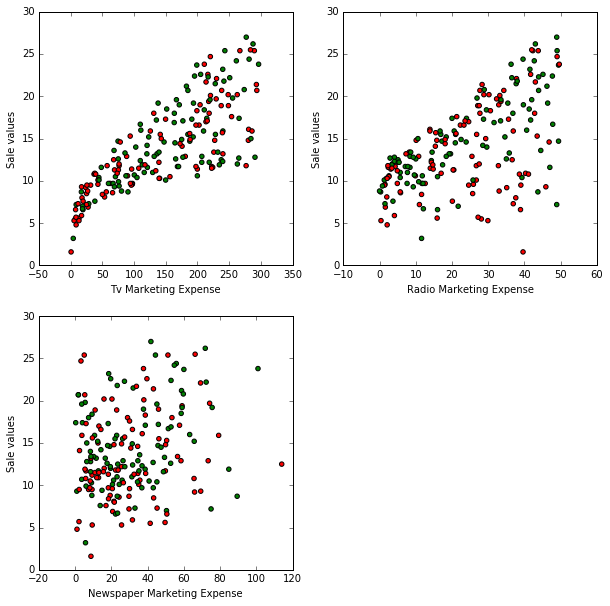

In [6]:
# Plot Marketing Medium viz. TV , Radio , Newspaper vs Sales correlation


plt.figure(figsize=(10,10))


# Tv vs Sales
plt.subplot(221)
plt.scatter(data_T.values,data_Y.values,c=colors)
plt.xlabel("Tv Marketing Expense")
plt.ylabel("Sale values")


# Radio vs Sales
plt.subplot(222)
plt.scatter(data_R.values,data_Y.values,c=colors)
plt.xlabel("Radio Marketing Expense")
plt.ylabel("Sale values")


# Newspaper vs Sales
plt.subplot(223)
plt.scatter(data_N.values,data_Y.values,c=colors)
plt.xlabel("Newspaper Marketing Expense")
plt.ylabel("Sale values")



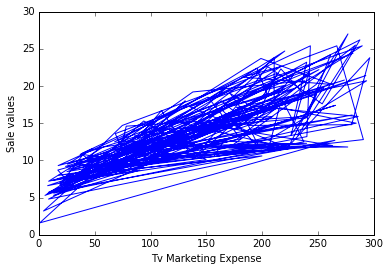

In [7]:
plt.plot(data_T.values,data_Y.values)
plt.xlabel("Tv Marketing Expense")
plt.ylabel("Sale values")

# Technique 1 - Train\Test Split

In [8]:
# Preparartion for ML

'''
Feature Selection
data_X = data[['TV','Radio','Newspaper']]
data_Y = data['Sales']
'''
data_features = ['TV','Radio','Newspaper']

# Split data into Train & Test data 
# default split is 75% for training and 25% for testing

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, random_state=1)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150L,)
(50, 3)
(50L,)


# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# Fit the model
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Linear Regression Results

In [11]:

# Post Fit - Linear Reg model parameters
print(linreg.intercept_)
# 2.87696662232
print(linreg.coef_)
#[ 0.04656457  0.17915812  0.00345046]
# y = 2.88 + 0.047x1 + 0.179x2 + 0.003x3


# pair the feature names with the coefficients
list(zip(data_features, linreg.coef_))


2.87696662232
[ 0.04656457  0.17915812  0.00345046]


[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088858),
 ('Newspaper', 0.0034504647111804209)]

# Make Prediction from Test dataset

In [12]:
y_pred = linreg.predict(X_test)

# Linear Regression Evaluation

In [13]:
from sklearn import metrics

# Eval 1 - R-Squared error
# Estimator score method: Estimators have a score method providing a default evaluation criterion for the 
# problem they are designed to solve.
R_Squared_error = linreg.score(X_test,y_test)
print "R-Squared error =",R_Squared_error

# Eval2 - RMSE 
RMSE = metrics.mean_squared_error(y_test,y_pred)
print "RMSE =",RMSE


# Eval3 - r2-score
r2_score = metrics.r2_score(y_test,y_pred)
print "r2_score =",r2_score

R-Squared error = 0.915621361379
RMSE = 1.97304562023
r2_score = 0.915621361379


# Store the Linear Reg Model evaluation

In [14]:
linRegModel = []
linRegModel.append("Linear Regression")
linRegModel.append(r2_score)
linRegModel.append(RMSE)
Model_comparison.append(linRegModel)

# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=.1)

ridgeReg.fit(X_train,y_train)

y_pred_ridge = ridgeReg.predict(X_test)

# Ridge Regression Evaluation

In [16]:
# Eval 1 - R-Squared error
# Estimator score method: Estimators have a score method providing a default evaluation criterion for the 
# problem they are designed to solve.
R_Squared_error = ridgeReg.score(X_test,y_test)
print "R-Squared error =",R_Squared_error

# Eval2 - RMSE 
RMSE = metrics.mean_squared_error(y_test,y_pred_ridge)
print "RMSE =",RMSE


# Eval3 - r2-score
r2_score = metrics.r2_score(y_test,y_pred_ridge)
print "r2_score =",r2_score

R-Squared error = 0.91562097462
RMSE = 1.97305466391
r2_score = 0.91562097462


# Store Ridge Reg Evaluation

In [17]:
ridgeRegModel = []
ridgeRegModel.append("Ridge Regression")
ridgeRegModel.append(r2_score)
ridgeRegModel.append(RMSE)
Model_comparison.append(ridgeRegModel)

In [18]:
Model_comparison

[['Linear Regression', 0.91562136137922334, 1.9730456202283355],
 ['Ridge Regression', 0.91562097461984226, 1.9730546639142177]]

# SGD - Stochastic Gradient Descent

In [19]:
from sklearn.linear_model import SGDRegressor

sgdReg = SGDRegressor()

sgdReg.fit(X_train, y_train)

y_pred_sgdReg = sgdReg.predict(X_test)

# SGD - Stochastic Gradient Descent Evaluation

In [20]:
# Eval 1 - R-Squared error
# Estimator score method: Estimators have a score method providing a default evaluation criterion for the 
# problem they are designed to solve.
R_Squared_error = sgdReg.score(X_test,y_test)
print "R-Squared error =",R_Squared_error

# Eval2 - RMSE 
RMSE = metrics.mean_squared_error(y_test,y_pred_sgdReg)
print "RMSE =",RMSE


# Eval3 - r2-score
r2_score = metrics.r2_score(y_test,y_pred_sgdReg)
print "r2_score =",r2_score

R-Squared error = -7.00772642475e+25
RMSE = 1.63863320813e+27
r2_score = -7.00772642475e+25


# Store SGD Reg Evaluation

In [21]:
sgdRegModel = []
sgdRegModel.append("SGD Regression")
sgdRegModel.append(-r2_score)
sgdRegModel.append(RMSE)
Model_comparison.append(sgdRegModel)

# Technique 2 - Cross Validation

# 10 Fold Cross Validation - Linear Regression

In [22]:
# Data Preparation

data = pd.read_csv("Advertising.csv")
data_X = data[['TV','Radio','Newspaper']]

data_Y = data['Sales']
data_T = data['TV']
data_R = data['Radio']
data_N = data['Newspaper']


In [23]:

from sklearn.linear_model import LinearRegression

linRegCV = LinearRegression()

from sklearn.cross_validation import cross_val_score

CrossValScore_mse = cross_val_score(linRegCV,data_X,data_Y,cv=10,scoring='mean_squared_error')

# fix the sign of MSE scores
CrossValScore_mse_positive = -CrossValScore_mse
print(CrossValScore_mse_positive)
# convert from MSE to RMSE
RMSE = np.sqrt(CrossValScore_mse_positive)
# calculate the average RMSE
RMSE_mean = RMSE.mean()


r2_score = cross_val_score(linRegCV,data_X,data_Y,cv=10,scoring='r2')
#r2_score = -r2_score
r2_score_mean = r2_score.mean()

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


# Store 10-Fold Cross Val Evaluation

In [24]:
linRegCVModel = []
linRegCVModel.append("10 CV Linear Regression")
linRegCVModel.append(r2_score_mean)
linRegCVModel.append(RMSE_mean)
Model_comparison.append(linRegCVModel)


# All Model Comparison

In [25]:
print ("Model name","r2 score","RMSE""")
Model_comparison

('Model name', 'r2 score', 'RMSE')


[['Linear Regression', 0.91562136137922334, 1.9730456202283355],
 ['Ridge Regression', 0.91562097461984226, 1.9730546639142177],
 ['SGD Regression', 7.0077264247527312e+25, 1.6386332081342939e+27],
 ['10 CV Linear Regression', 0.88535622379796164, 1.6913531708051797]]

# Marketing Expense vs Sale in Future

In [26]:

exp = [[20,40,50],[67,78,90]]

sale_pred = linreg.predict(exp)
sale_pred

array([ 11.14710611,  20.28166805])